<a href="https://colab.research.google.com/github/ArchanaBarigela/AI/blob/main/Assignment_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import math as mt
import random
import pandas as pd
import sys

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error
c=-1
eeta=0.1
max_iter=1000
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Load Data in kW.csv')
data.head()

,Date,Time,Load (kW)
0,01.09.2018,0:00,5551.82208
1,NaN,1:00,4983.17184
2,NaN,2:00,4888.39680
3,NaN,3:00,5072.95872
4,NaN,4:00,5196.25980


In [ ]:
X1=[]
X2=[]
X3=[]
Y=[]
data=data['Load (kW)']
for i in range(3,data.shape[0]):
     X1.append(data.iloc[i-3])
     X2.append(data.iloc[i-2])
     X3.append(data.iloc[i-1])
     Y.append(data.iloc[i])

In [ ]:
data=pd.DataFrame({'L(T-3)':X1,'L(T-2)':X2,'L(T-1)':X3,'L(T)':Y})
data.head()

,L(T-3),L(T-2),L(T-1),L(T)
0,5551.82208,4983.17184,4888.39680,5072.95872
1,4983.17184,4888.39680,5072.95872,5196.25980
2,4888.39680,5072.95872,5196.25980,5641.29720
3,5072.95872,5196.25980,5641.29720,7153.17732
4,5196.25980,5641.29720,7153.17732,7849.80504


In [ ]:
def normalize(column):
    c_max,c_min=np.max(column),np.min(column)
    for i in range(len(column)):
        column.iloc[i]=(column.iloc[i]-c_min)/(c_max-c_min)
    return c_max,c_min
x1max,x1min=normalize(data['L(T-3)'])
x2max,x2min=normalize(data['L(T-2)'])
x3max,x3min=normalize(data['L(T-1)'])
ymax,ymin=normalize(data['L(T)'])
data.head()

,L(T-3),L(T-2),L(T-1),L(T)
0,0.397877,0.293800,0.276454,0.310234
1,0.293800,0.276454,0.310234,0.332801
2,0.276454,0.310234,0.332801,0.414254
3,0.310234,0.332801,0.414254,0.690965
4,0.332801,0.414254,0.690965,0.818465


In [ ]:
data.isnull().sum()

L(T-3)    0
L(T-2)    0
L(T-1)    0
L(T)      0
dtype: int64

In [ ]:
X=data[['L(T-3)','L(T-2)','L(T-1)']]
Y=data['L(T)']
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,Y,test_size=0.1,random_state=101)

In [ ]:

m=[np.random.uniform(-10,10) for i in range (Xtrain.shape[1])]
c=np.random.uniform(-10,10)
epochs=500
for _ in range (epochs):
    for i in range (Xtrain.shape[0]):
     Y,Ypred=Ytrain.iloc[i],sum([Xtrain.iat[i,z]*m[z] for z in range(Xtrain.shape[1])])
     gradm=[-1*Xtrain.iat[i,j]*(Y-Ypred-c) for j in range(Xtrain.shape[1])]
     gradc=-1*(Y-Ypred-c)
     c=c-eeta*gradc
     for j in range (len(m)):
        m[j]=m[j]-eeta*gradm[j]
print (m,c)
m1=m[0]
m2=m[1]
m3=m[2]

In [ ]:
y_pred_train = []
for sample in range(Xtrain.shape[0]):
  y_p_tr = (m[0] * Xtrain.iat[sample,0]) + c + (m[1] *Xtrain.iat[sample,1] )+(m[2]*Xtrain.iat[sample,2])
  y_pred_train.append(y_p_tr)

In [ ]:
y_pred_test = []
for sample in range(Xtest.shape[0]):
  y_p_te = (m[0] * Xtest.iat[sample,0]) + c + (m[1] * Xtest.iat[sample,1])+(m[2]*Xtest.iat[sample,2])
  y_pred_test.append(y_p_te)

In [ ]:
#Denormalize
Xtrain['L(T-3)']=Xtrain['L(T-3)']*(x1max-x1min)+x1min
Xtrain ['L(T-2)']=Xtrain ['L(T-2)']*(x2max-x2min)+x2min
Xtrain ['L(T-1)']=Xtrain ['L(T-1)']*(x3max-x2min)+x3min
Ytrain=Ytrain*(ymax-ymin)+ymin
Xtest['L(T-3)']=Xtest['L(T-3)']*(x1max-x1min)+x1min
Xtest['L(T-3)']=Xtest['L(T-2)']*(x2max-x2min)+x2min
Xtest['L(T-3)']=Xtest['L(T-1)']*(x3max-x3min)+x3min
Ytest=Ytest*(ymax-ymin)+ymin
y_pred_train=np.multiply(y_pred_train,(ymax-ymin)+ymin)
y_pred_test=np.multiply(y_pred_test,(ymax-ymin)+ymin)

In [ ]:
import math
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import mean_absolute_error


#Training Accuracies
rmse = math.sqrt(mean_squared_error(y_pred_train, Ytrain)) 
print('Root mean square error', rmse) 
mse = (mean_squared_error(y_pred_train,Ytrain)) 
print('Mean square error', mse) 
mae=mean_absolute_error(y_pred_train,Ytrain)
print('Mean absolute error', mae)



Root mean square error 1879.5529965234537
Mean square error 3532719.4667402934
Mean absolute error 1706.953429732576


In [ ]:
#Testing Accuracies
rmse = math.sqrt(mean_squared_error(y_pred_test,Ytest )) 
print('Root mean square error', rmse) 
mse = (mean_squared_error(y_pred_test,Ytest))
print('Mean square error', mse) 
mae=mean_absolute_error(y_pred_test,Ytest)
print('Mean absolute error', mae)

Root mean square error 1785.9020140324428
Mean square error 3189446.0037251357
Mean absolute error 1616.4460727097792


In [ ]:
Xtrain ['Y_Train']=Ytrain
Xtrain['Y_Train_prediction']=y_pred_train
Xtrain

In [ ]:
X1=input('enter X1 value')
X2=input('enter X2 value')
X3=input ('enter X3 value')
print('X1=',X1)
print('X2=',X2)
print ('x3=',X3)
Y=m1*float(X1)+m2*float(X2)+m3*float(X3)+c
print('Y=',Y)

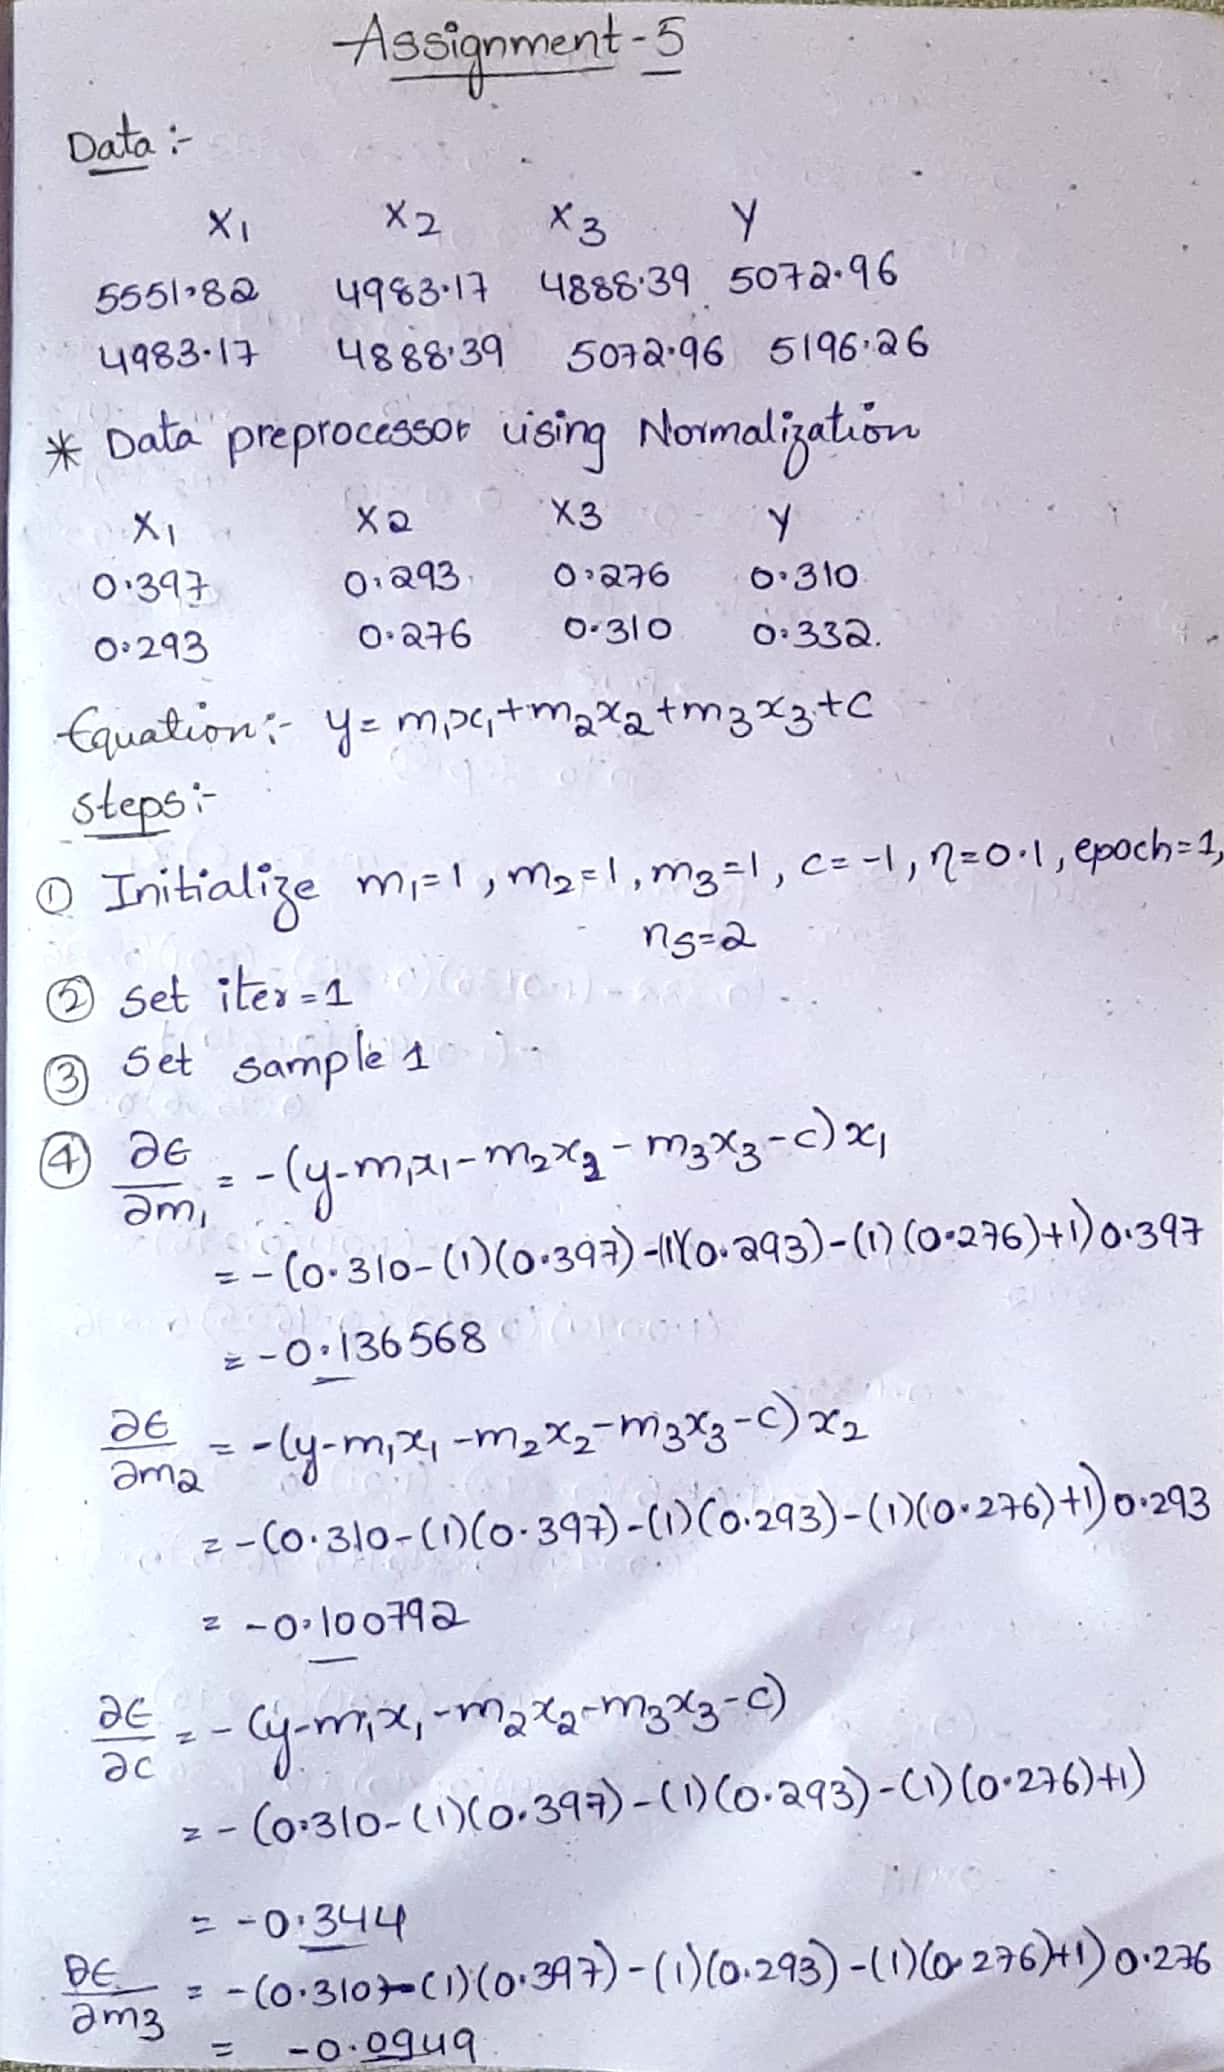

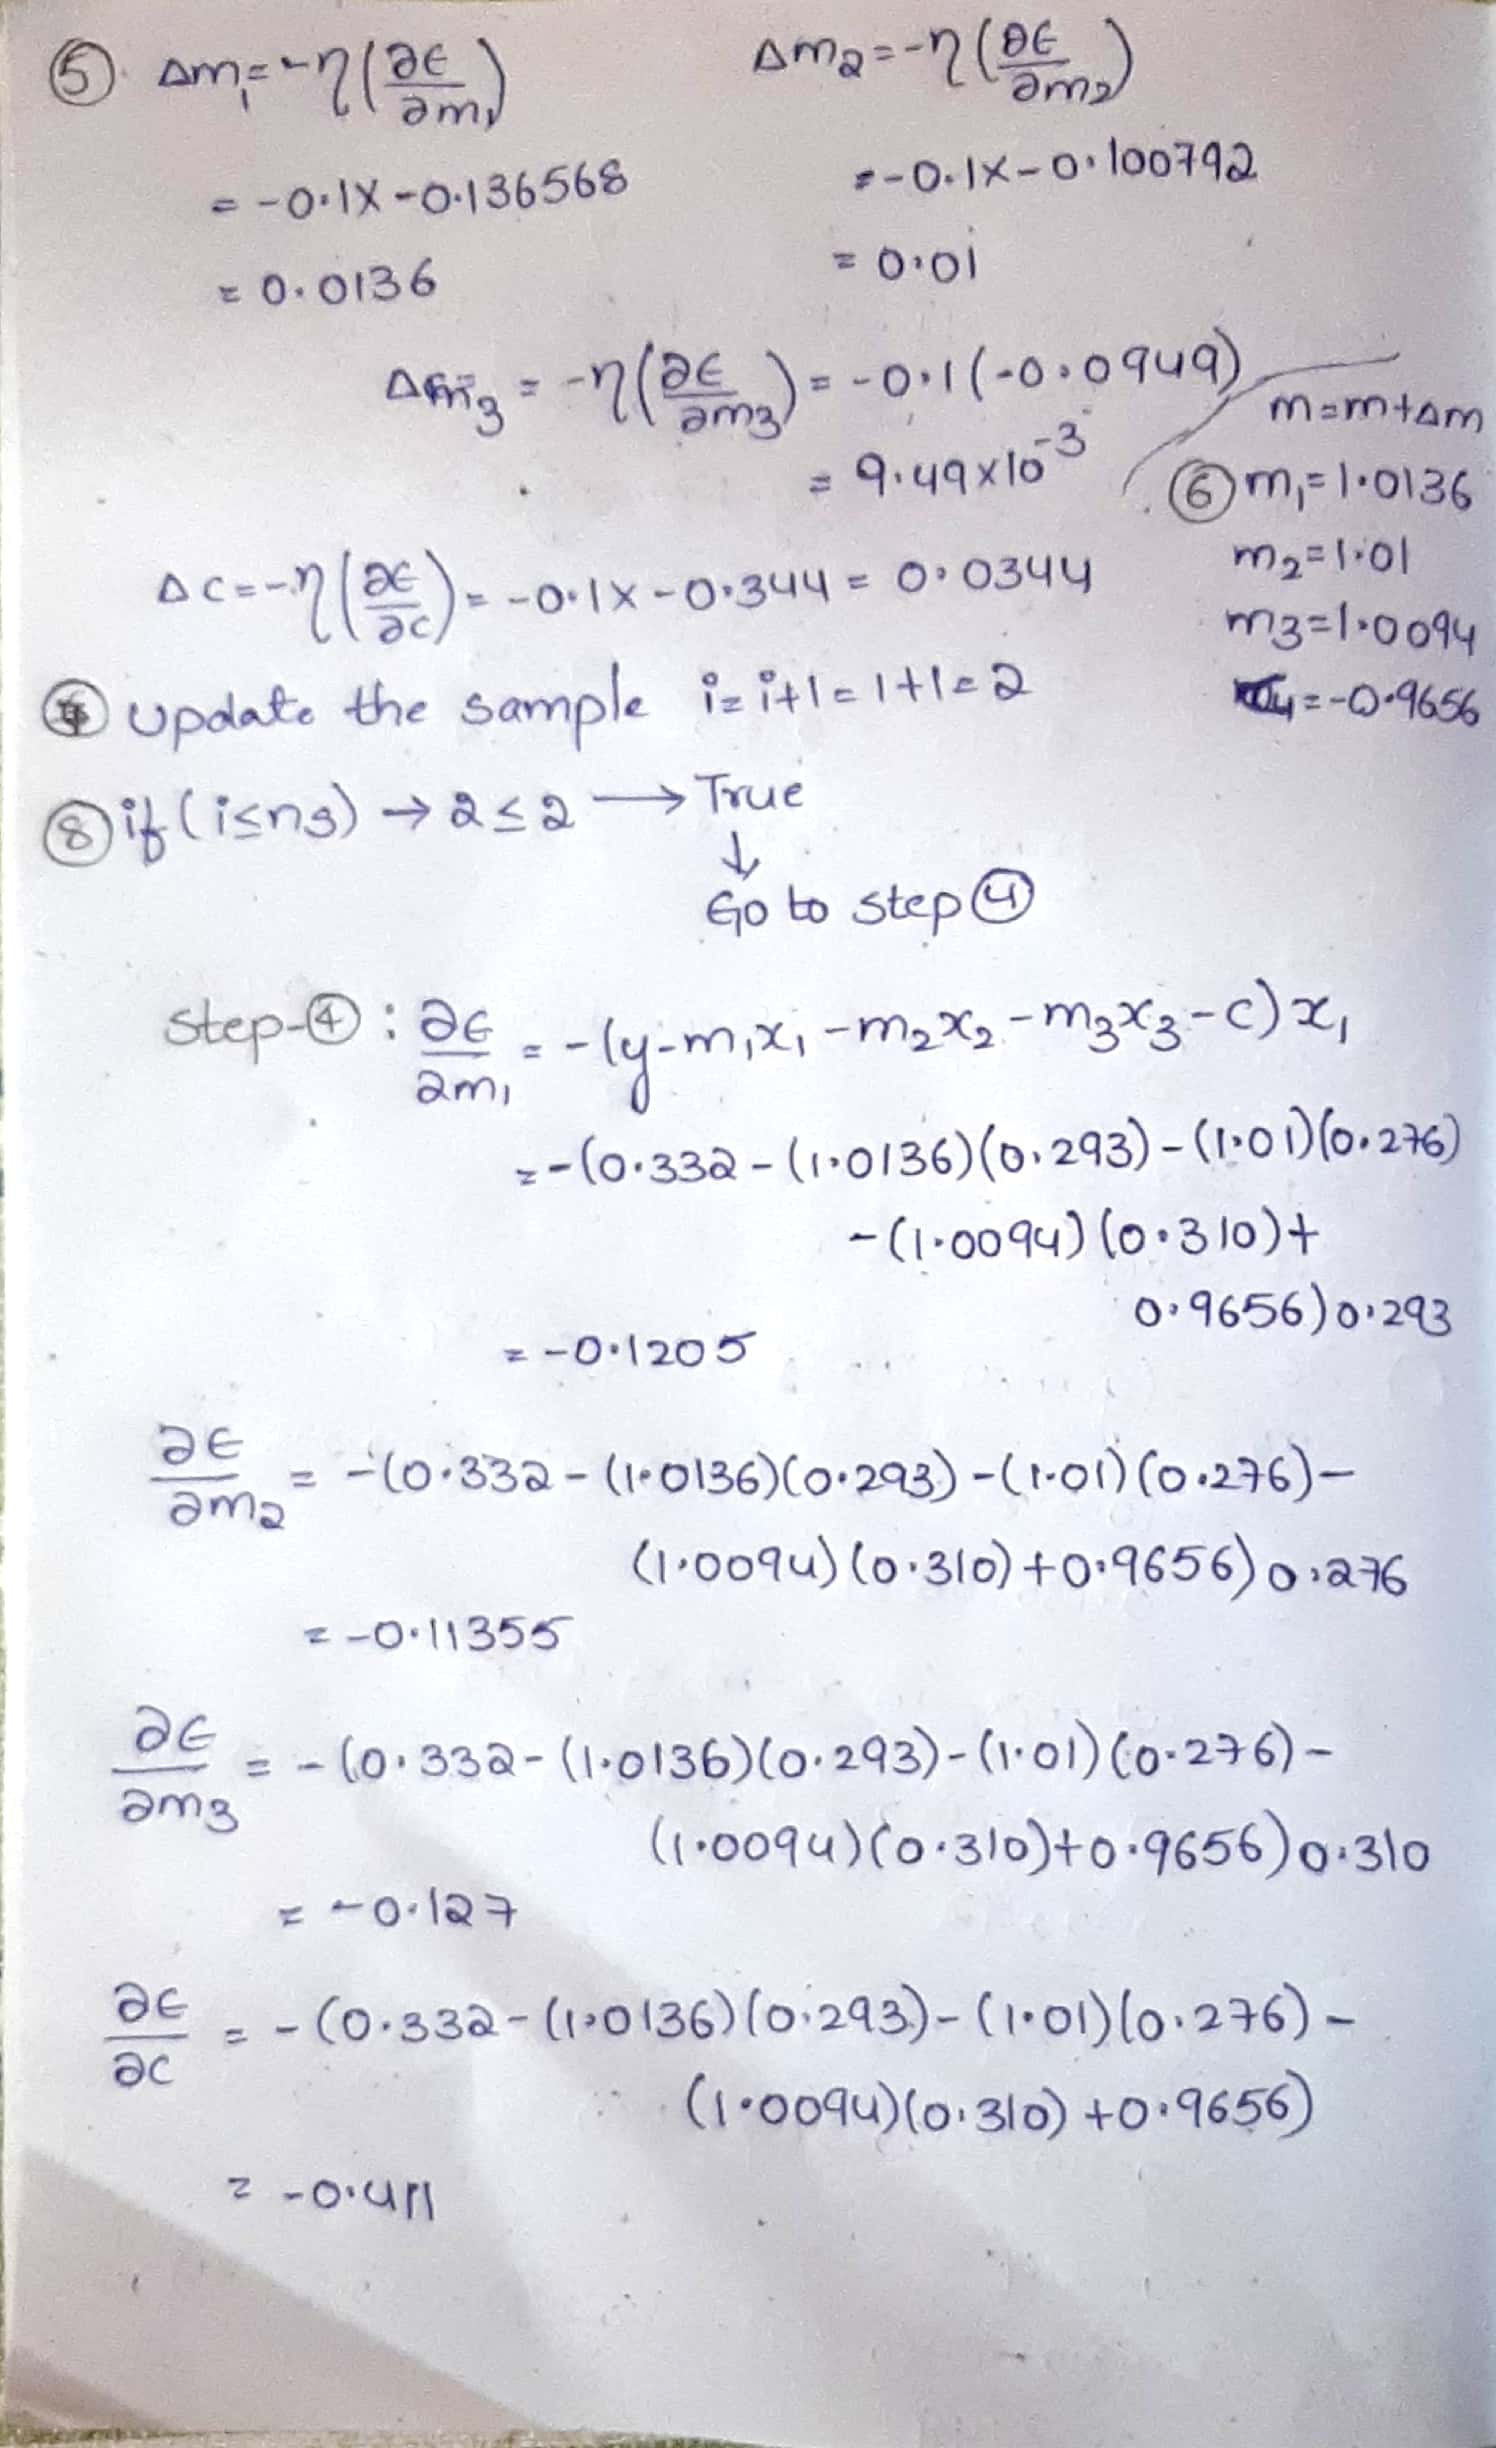

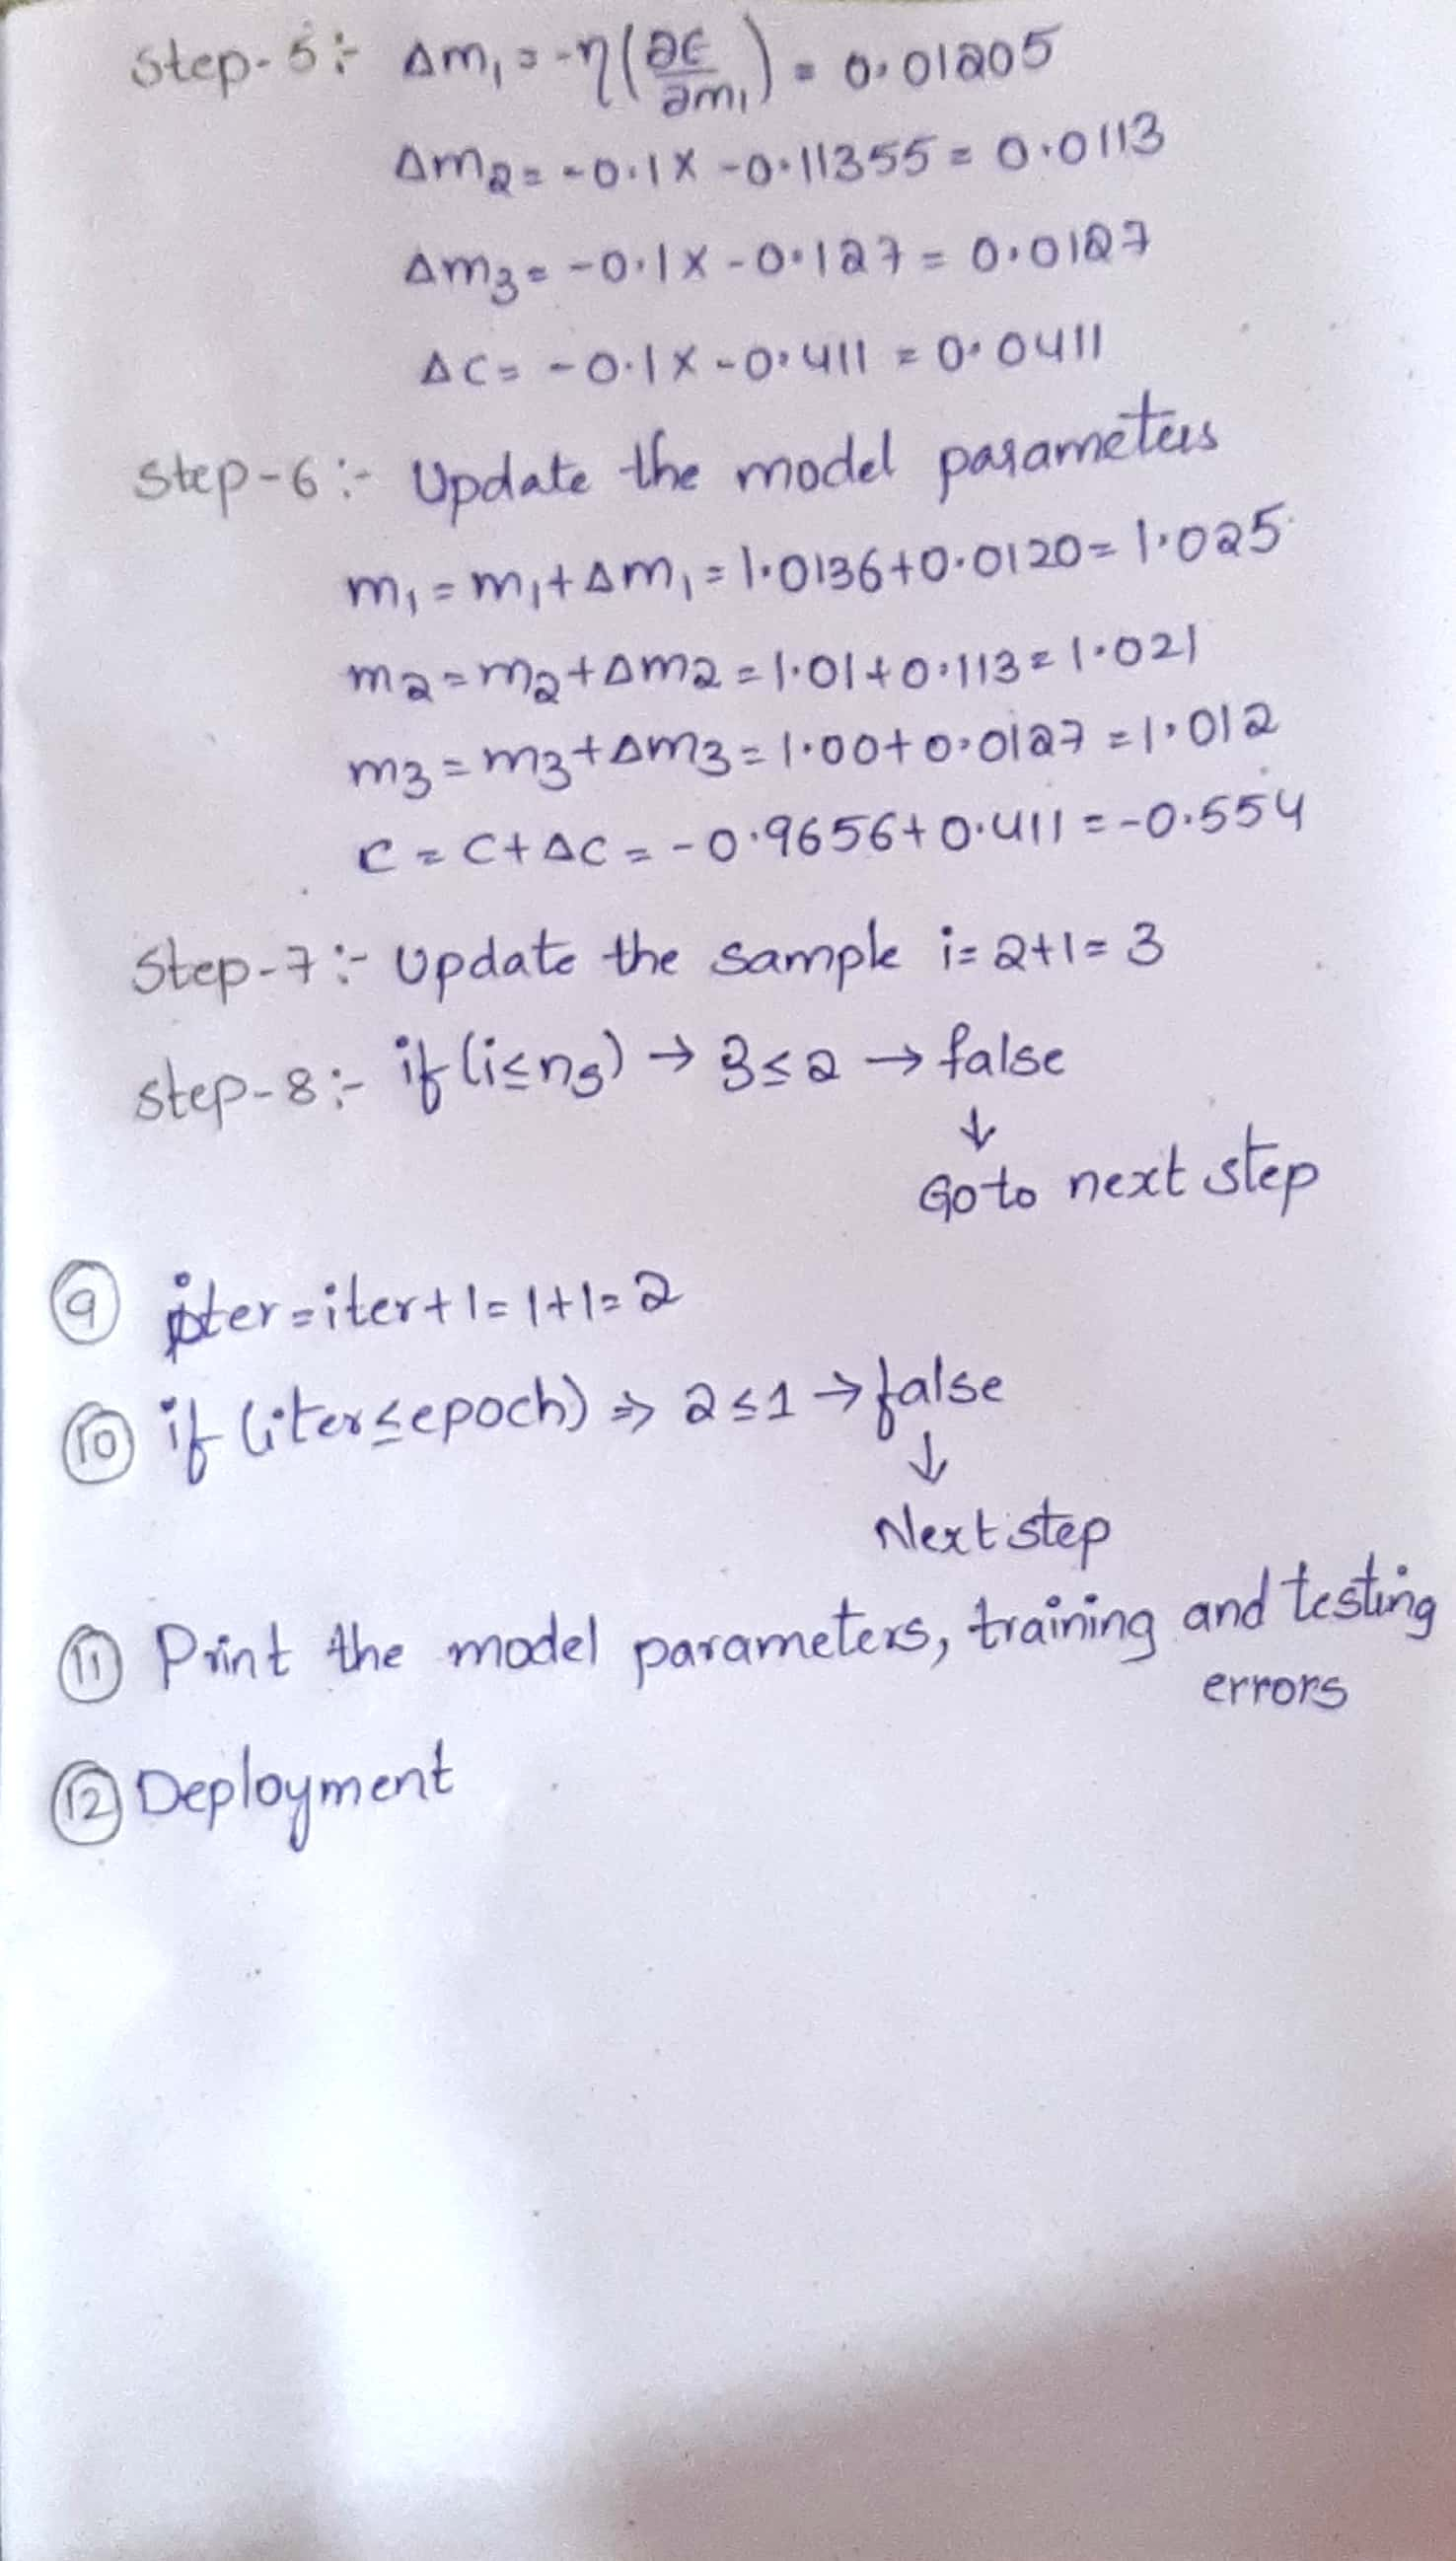